In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 
%matplotlib inline

from sklearn.linear_model import LinearRegression, HuberRegressor


train = pd.read_csv('train.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)

In [ ]:
### Reference
#https://www.kaggle.com/vikassingh1996/
#comprehensive-data-preprocessing-and-modeling

# 1.0 Our Data

In [2]:
print('Dimensions of train data:', train.shape)
print('Dimensions of test data:', test.shape)

Dimensions of train data: (1460, 80)
Dimensions of test data: (1459, 79)


### 1.1 Looking at the column values in the train dataset

In [ ]:
train.columns.values


### 1.2 Isolating the Numerical variables 

In [ ]:
train.dtypes

In [3]:
num_housing = train.select_dtypes(include = ['int64', 'float64'])
display(num_housing.head())
display(num_housing.columns.values)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

# 2.0  Relationships

In [4]:
train.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
             ]] = train.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
                               ]].astype('object')

### 2.1 Correlation heatmap for all Continuous variables

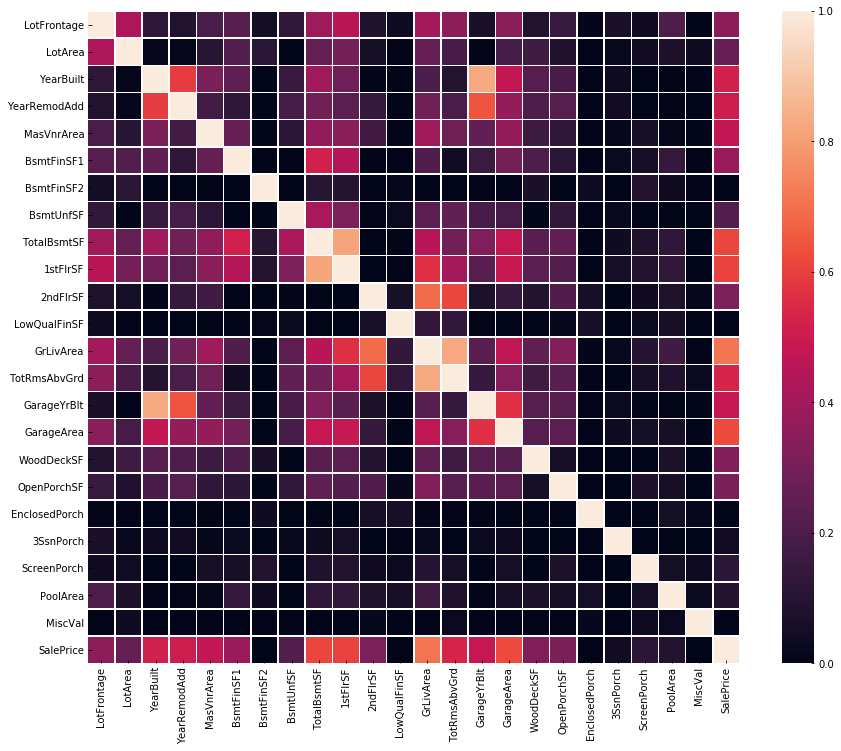

In [5]:
corr = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

### 2.2 Top 10 Correlations

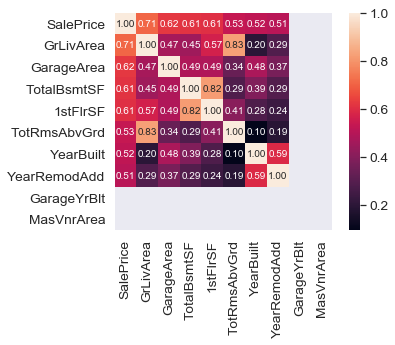

In [6]:
k = 10 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Highest Correlations seem to be: 
   - Overall Quality
   - Great Living Area
   - Garage Cars
   - Garage Area
   - Total Basement SF
   - First Floor SF
   - Full Bathrooms
   - Total Rooms above ground
   - Year Built

Feature selection?

# 3.0 Checking Assumptions: Linearity

#### 1stFlrSF vs. Sale Price

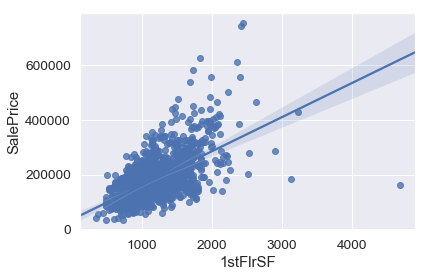

In [7]:
sns.regplot(x=train["1stFlrSF"], y=train["SalePrice"])

In [8]:
threshold = 2000

train = train[train.loc[:,'1stFlrSF'] < threshold]


##### GrLivArea vs. Sale Price

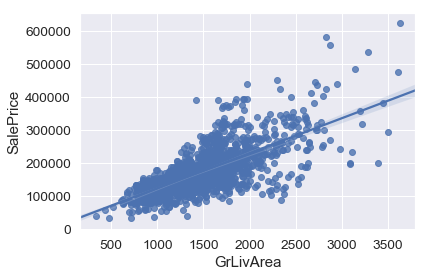

In [9]:
sns.regplot(x=train["GrLivArea"], y=train["SalePrice"])

In [10]:
threshold = 2500

train = train[train.loc[:,'GrLivArea'] < threshold]




##### Garage Area vs. SalePrice

There was a very large number of 0 observations, Meaning that there is no garage. I eliminated these because they do neither add nor subtract anything from the analysis.

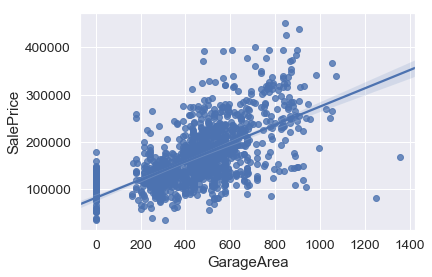

In [11]:
sns.regplot(x=train["GarageArea"], y=train["SalePrice"])

In [12]:
threshold = 800

train = train[train.loc[:,'GarageArea'] < threshold]

##### Total Basement SF vs. SalePrice

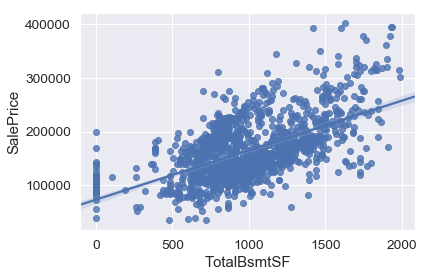

In [13]:

sns.regplot(x=train["TotalBsmtSF"], y=train["SalePrice"])

In [ ]:
threshold = 1500

train = train[train.loc[:,'TotalBsmtSF'] < threshold]


##### Total Rooms Above Ground vs. SalePrice

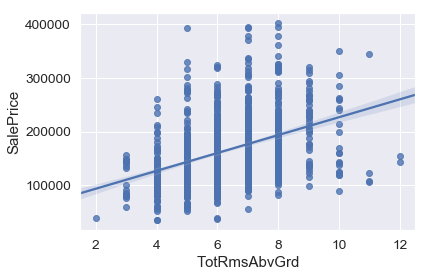

In [14]:

sns.regplot(x=train['TotRmsAbvGrd'], y=train["SalePrice"])

In [ ]:
threshold = 14

train = train[train.loc[:,'TotRmsAbvGrd'] < threshold]

## 3.1 Missing Variables

In [15]:
###### Combining Data
ntrain = train.shape[0]
ntest = test.shape[0]

housing_merge = pd.concat((train, test)).reset_index(drop=True)

y_house = pd.DataFrame(train.SalePrice.values)

housing_merge.drop(['SalePrice'], axis=1, inplace=True)

print("Train data size is : {}".format(train.shape))
print("Test data size is : {}".format(test.shape))
print("Combined dataset size is : {}".format(housing_merge.shape))

Train data size is : (1280, 80)
Test data size is : (1459, 79)
Combined dataset size is : (2739, 79)


/Users/lauraelliott/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [16]:
total = housing_merge.isna().sum()/housing_merge.isna().count()
sum=housing_merge.isna().sum()

missing=pd.concat([total,sum],axis=1,keys=['Perc','Sum']).sort_values(by='Perc',ascending=False)

colstodrop = missing[missing['Sum']>0].index

missing[missing['Sum']>0]

,Perc,Sum
PoolQC,0.997809,2733
MiscFeature,0.963125,2638
Alley,0.930267,2548
Fence,0.800292,2192
FireplaceQu,0.508215,1392
LotFrontage,0.168310,461
GarageYrBlt,0.057320,157
GarageQual,0.057320,157
GarageFinish,0.057320,157
GarageCond,0.057320,157


In [17]:
y_house.head()

,0
0,208500
1,181500
2,223500
3,140000
4,143000


#### Converting categorical variables in the merged dataset

In [18]:
housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
             ]] = housing_merge.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'BedroomAbvGr',
               'BsmtFullBath', 'BsmtHalfBath', 'Fireplaces', 'FullBath', 'GarageCars', 'HalfBath',
               'KitchenAbvGr' 
                               ]].astype('object')

## 3.2 Imputation

#### Imputing mode for MSZoning, Electrical, Utilites, Exterior1st/2nd, KitchenQual, Functional, SaleType, TotalSF

In [19]:
## MSZoning
housing_merge['MSZoning']=housing_merge['MSZoning'].fillna('RL')
print('MSZoning unique Values: ', housing_merge['MSZoning'].unique())

MSZoning unique Values:  ['RL' 'RM' 'C (all)' 'FV' 'RH']


In [20]:
## Electrical
housing_merge['Electrical']=housing_merge['Electrical'].fillna('SBrkr')
print('Electrical unique values: ', housing_merge['Electrical'].unique())

Electrical unique values:  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']


In [21]:
## Utilities
housing_merge['Utilities']=housing_merge['Utilities'].fillna('AllPub')
print('Utility unique values: ', housing_merge['Utilities'].unique())

Utility unique values:  ['AllPub' 'NoSeWa']


In [22]:
## Exterior1st
housing_merge['Exterior1st']=housing_merge['Exterior1st'].fillna('VinylSd')
print('Exterior1st unique values: ', housing_merge['Exterior1st'].unique())

Exterior1st unique values:  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']


In [23]:
## Exterior2nd
housing_merge['Exterior2nd']=housing_merge['Exterior2nd'].fillna('VinylSd')
print('Exterior2nd unique values: ', housing_merge['Exterior2nd'].unique())

Exterior2nd unique values:  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Other'
 'Stone' 'CBlock']


In [24]:

## KitchenQual
housing_merge['KitchenQual']=housing_merge['KitchenQual'].fillna('TA')
print('Kitchen Quality unique values: ', housing_merge['KitchenQual'].unique())

Kitchen Quality unique values:  ['Gd' 'TA' 'Ex' 'Fa']


In [25]:
#Functional
housing_merge['Functional']=housing_merge['Functional'].fillna('Typ')
print('Functional unique values: ', housing_merge['Functional'].unique())

Functional unique values:  ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']


In [26]:
##SaleType
housing_merge['SaleType']=housing_merge['SaleType'].fillna('WD')
print('SaleType unique values: ', housing_merge['SaleType'].unique())


SaleType unique values:  ['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


  #### Imputing median for Lot Frontage,  MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, GarageArea

In [27]:
# LotFrontage
housing_merge['LotFrontage'].fillna(housing_merge['LotFrontage'].mean(), inplace=True)
print('LotFrontage missing:', housing_merge['LotFrontage'].isna().sum())


LotFrontage missing: 0


In [28]:

# MasVnrArea
housing_merge['MasVnrArea'].fillna(housing_merge['MasVnrArea'].mean(), inplace=True)
print('MasVnrArea missing:', housing_merge['MasVnrArea'].isna().sum())


MasVnrArea missing: 0


In [29]:
# BsmtFinSF1
housing_merge['BsmtFinSF1'].fillna(housing_merge['BsmtFinSF1'].mean(), inplace=True)
print('BsmtFinSF1 missing:', housing_merge['BsmtFinSF1'].isna().sum())


BsmtFinSF1 missing: 0


In [30]:
# BsmtFinSF2
housing_merge['BsmtFinSF2'].fillna(housing_merge['BsmtFinSF2'].mean(), inplace=True)
print('BsmtFinSF2 missing:', housing_merge['BsmtFinSF2'].isna().sum())


BsmtFinSF2 missing: 0


In [31]:
# BsmtUnfSF
housing_merge['BsmtUnfSF'].fillna(housing_merge['BsmtUnfSF'].mean(), inplace=True)
print('BsmtunfSF missing:', housing_merge['BsmtUnfSF'].isna().sum())


BsmtunfSF missing: 0


In [32]:
# TotalBasmtSF
housing_merge['TotalBsmtSF'].fillna(housing_merge['TotalBsmtSF'].mean(), inplace=True)
print('TotalBsmtSF missing:', housing_merge['TotalBsmtSF'].isna().sum())



TotalBsmtSF missing: 0


In [33]:
# GarageArea
housing_merge['GarageArea'].fillna(housing_merge['GarageArea'].mean(), inplace=True)
print('GarageArea missing:', housing_merge['GarageArea'].isna().sum())



GarageArea missing: 0


In [34]:
# Total Bsmt Sf
housing_merge['TotalBsmtSF'].fillna(housing_merge['TotalBsmtSF'].mean(), inplace=True)
print('TotalBsmtSF missing:', housing_merge['TotalBsmtSF'].isna().sum())




TotalBsmtSF missing: 0


#### Imputing median for Bsmt FullBath, BsmtHalfBath, GarageCars, GarageYrBlt

In [35]:
##BedroomAbvGr
housing_merge['BedroomAbvGr'].fillna(housing_merge['BedroomAbvGr'].median(),inplace = True)
print('BedroomAbvGr missing: ', housing_merge['BedroomAbvGr'].isna().sum())

BedroomAbvGr missing:  0


In [36]:
# BsmtFullBath
housing_merge['BsmtFullBath'].fillna(housing_merge['BsmtFullBath'].median(), inplace=True)
print('BsmtFullBath missing:', housing_merge['BsmtFullBath'].isna().sum())



BsmtFullBath missing: 0


In [37]:
#BsmtHalfBath
housing_merge['BsmtHalfBath'].fillna(housing_merge['BsmtHalfBath'].median(), inplace=True)
print('BsmtHalfBath missing:', housing_merge['BsmtHalfBath'].isna().sum())

BsmtHalfBath missing: 0


In [38]:
#Garage Cars
housing_merge['GarageCars'].fillna(housing_merge['GarageCars'].median(), inplace=True)
print('GarageCars missing:', housing_merge['GarageCars'].isna().sum())

GarageCars missing: 0


In [39]:
#GarageYrBlt
housing_merge['GarageYrBlt'].fillna(housing_merge['GarageYrBlt'].median(), inplace=True)
print('GarageYrBlt missing:', housing_merge['GarageYrBlt'].isna().sum())

GarageYrBlt missing: 0


In [40]:
#Fireplaces
housing_merge['Fireplaces'].fillna(housing_merge['Fireplaces'].median(), inplace=True)
print('Fireplaces missing:', housing_merge['Fireplaces'].isna().sum())

Fireplaces missing: 0


In [41]:
#FullBath
housing_merge['FullBath'].fillna(housing_merge['FullBath'].median(), inplace=True)
print('FullBath missing:', housing_merge['FullBath'].isna().sum())

FullBath missing: 0


In [42]:
#HalfBath 
housing_merge['HalfBath'].fillna(housing_merge['HalfBath'].median(), inplace=True)
print('HalfBath  missing:', housing_merge['HalfBath'].isna().sum())

HalfBath  missing: 0


In [43]:

#KitchenAbvGr 
housing_merge['KitchenAbvGr'].fillna(housing_merge['KitchenAbvGr'].median(), inplace=True)
print('KitchenAbvGr  missing:', housing_merge['KitchenAbvGr'].isna().sum())

KitchenAbvGr  missing: 0


In [44]:
#MSSubClass 
housing_merge['MSSubClass'].fillna(housing_merge['MSSubClass'].median(), inplace=True)
print('MSSubClass  missing:', housing_merge['MSSubClass'].isna().sum())

MSSubClass  missing: 0


In [45]:
#MoSold 
housing_merge['MoSold'].fillna(housing_merge['MoSold'].median(), inplace=True)
print('MoSold missing:', housing_merge['MoSold'].isna().sum())

MoSold missing: 0


In [46]:
#OverallCond 
housing_merge['OverallCond'].fillna(housing_merge['OverallCond'].median(), inplace=True)
print('OverallCond missing:', housing_merge['OverallCond'].isna().sum())

OverallCond missing: 0


In [47]:
#OverallQual
housing_merge['OverallQual'].fillna(housing_merge['OverallQual'].median(), inplace=True)
print('OverallQual missing:', housing_merge['OverallQual'].isna().sum())

OverallQual missing: 0


In [48]:
#YrSold
housing_merge['YrSold'].fillna(housing_merge['YrSold'].median(), inplace=True)
print('YrSold missing:', housing_merge['YrSold'].isna().sum())

YrSold missing: 0


#### Imputing 'None' for missing values where NaN is meaningful, i.e. PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageCOnd, GarageFinish, GarageQual, BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1, MasVnrType

In [49]:
impute_none = housing_merge.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 
                                    'GarageType', 'GarageCond','GarageFinish','GarageQual',
                                    'BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1',
                                    'MasVnrType']]
for i in impute_none.columns:
    housing_merge[i].fillna('None', inplace = True)

In [50]:
#Check

missing_columns = housing_merge.columns[housing_merge.isnull().any()].values
missing_columns = len(housing_merge) - housing_merge.loc[:, np.sum(housing_merge.isnull())>0].count()
missing_columns

Series([], dtype: int64)

In [51]:
housing_merge.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object
MiscVal            int64


In [52]:
housing_merge.isna().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
Alley            0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
                ..
LotFrontage      0
LotShape         0
LowQualFinSF     0
MSSubClass       0
MSZoning         0
MasVnrArea       0
MasVnrType       0
MiscFeature      0
MiscVal          0
MoSold           0
Neighborhood     0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PavedDrive       0
PoolArea         0
PoolQC           0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         0
ScreenPorch 

In [53]:
######### New Features

housing_merge['TotalSF'] = (housing_merge['BsmtFinSF1'] + housing_merge['BsmtFinSF2'] 
                           + housing_merge['1stFlrSF'] + housing_merge['2ndFlrSF'])



In [54]:

housing_merge['TotalBathrooms'] = housing_merge['Total_Bathrooms'] = (housing_merge['FullBath'] + (0.5 * housing_merge['HalfBath']) +
                               housing_merge['BsmtFullBath'] + (0.5 * housing_merge['BsmtHalfBath']))



In [55]:
housing_merge['TotalPorchSF'] = (housing_merge['OpenPorchSF'] + housing_merge['3SsnPorch'] +
                             housing_merge['EnclosedPorch'] + housing_merge['ScreenPorch'] +
                              housing_merge['WoodDeckSF'])

In [56]:
housing_merge.isna().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
Alley              0
BedroomAbvGr       0
BldgType           0
BsmtCond           0
BsmtExposure       0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtFinType1       0
BsmtFinType2       0
BsmtFullBath       0
BsmtHalfBath       0
BsmtQual           0
BsmtUnfSF          0
CentralAir         0
Condition1         0
Condition2         0
Electrical         0
EnclosedPorch      0
ExterCond          0
ExterQual          0
Exterior1st        0
Exterior2nd        0
Fence              0
FireplaceQu        0
Fireplaces         0
Foundation         0
FullBath           0
                  ..
MSZoning           0
MasVnrArea         0
MasVnrType         0
MiscFeature        0
MiscVal            0
MoSold             0
Neighborhood       0
OpenPorchSF        0
OverallCond        0
OverallQual        0
PavedDrive         0
PoolArea           0
PoolQC             0
RoofMatl           0
RoofStyle          0
SaleCondition      0
SaleType     

In [57]:
numeric_cols = housing_merge.dtypes[housing_merge.dtypes != "object"].index

In [58]:
categori_cols = housing_merge.dtypes[housing_merge.dtypes == object]

In [59]:
housing_merge.shape

(2739, 83)

# 4.0 Checking Assumptions: Normality

#### 4.1 Normality and Transformation of Dependent Variable Sale Price
Skewness rule of thumb:
if skewness < -1 or greater than 1, the distribution is highley skewed

if the skewness is between +/- 1 and +/- 0.5 the distribution is moderately skewed

if the skewness is between -0.5 and 0.5 the distribution is approximately symmetric

In [60]:
from scipy import stats
from scipy.stats import norm,skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import pandas as pd

In [61]:
skewed_num = housing_merge[numeric_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skew = pd.DataFrame({'Skew' :skewed_num})




In [62]:
skew_housing_merge = pd.DataFrame(skewed_num, columns=['Skewness'])

skew_housing_sort = skew_housing_merge.sort_values(ascending = False, by ='Skewness')
skew_housing_sort



,Skewness
MiscVal,22.868473
PoolArea,20.549748
LowQualFinSF,13.664211
3SsnPorch,11.511183
LotArea,11.000060
KitchenAbvGr,4.275412
BsmtFinSF2,4.108569
EnclosedPorch,3.994778
ScreenPorch,3.857240
BsmtHalfBath,3.842371


In [ ]:
########################

In [63]:
print("Skewness: %f" % y_house.skew()) ## the closer to 0, the more normal
print("Kurtosis: %f" % y_house.kurt())

Skewness: 0.958175
Kurtosis: 1.441017


<Figure size 720x432 with 0 Axes>

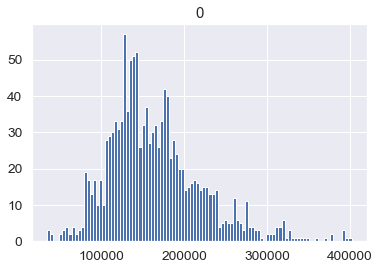

In [64]:
fig = plt.figure(figsize=(10,6))
y_house.hist(bins=100)
plt.show()

####  Transform Sale Price

In [65]:
y_house = np.log1p(y_house)

In [66]:
print("Skewness: %f" % y_house.skew())
print("Kurtosis: %f" % y_house.kurt())


Skewness: -0.294885
Kurtosis: 0.948961


<Figure size 720x432 with 0 Axes>

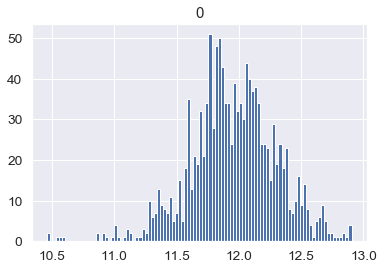

In [67]:
fig = plt.figure(figsize=(10,6))
y_house.hist(bins=100)
plt.show()

#### 4.2 Normality and Transformation of Explanatory Variables

In [68]:
num_housing_merge = housing_merge.select_dtypes(include = ['int64', 'float64'])
display(num_housing_merge.head())
display(num_housing_merge.columns.values)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,TotalSF,TotalBathrooms,Total_Bathrooms,TotalPorchSF
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,8,856.0,0,2003,2003,2008,2416.0,3.5,3.5,61
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,6,1262.0,298,1976,1976,2007,2240.0,2.5,2.5,298
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,6,920.0,0,2001,2002,2008,2272.0,3.5,3.5,42
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,7,756.0,0,1915,1970,2006,1933.0,2.0,2.0,307
4,796,566,320,1,732.0,0.0,1.0,0.0,64.0,0,...,5,796.0,40,1993,1995,2009,2094.0,2.5,2.5,390


array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold', 'TotalSF', 'TotalBathrooms',
       'Total_Bathrooms', 'TotalPorchSF'], dtype=object)

#### Skewness explanatory variables

In [ ]:
#skew_housing_merge = pd.DataFrame(data = housing_merge.select_dtypes(include = ['int64', 'float64'
#]).skew(), columns=['Skewness'])


#skew_housing_sort = skew_housing_merge.sort_values(ascending = False, by ='Skewness')
#skew_housing_sort

#### Transformation


Transform

In [69]:
## non normal data
housing_merged_skewed = np.log1p(num_housing_merge[num_housing_merge.skew()[num_housing_merge.skew() > 0.5].index])

## normal data
housing_merged_normal = num_housing_merge[num_housing_merge.skew()[num_housing_merge.skew() < 0.5].index]

## combining 
housing_merged_num_all = pd.concat([housing_merged_skewed, housing_merged_normal], axis = 1)


## Updating numerical Data
num_housing_merge.update(housing_merged_num_all)

#### Updating combined data
housing_merge.update(num_housing_merge)

/Users/lauraelliott/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


After

In [ ]:
#def draw_histograms(df, variables, n_rows, n_cols):
 #   fig=plt.figure()
  #  for i, var_name in enumerate(variables):
   #     ax=fig.add_subplot(n_rows,n_cols,i+1)
    #    df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (40, 200))
     #   ax.set_title(var_name, fontsize = 43)
      #  ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
       # ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
        #ax.set_xlabel('')
   # fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
   # plt.show()
    
#draw_histograms(num_housing_merge, num_housing_merge.columns, 19, 2)

In [70]:
skew_housing_merge = pd.DataFrame(data = num_housing_merge.select_dtypes(include = ['int64', 'float64'
]).skew(), columns=['Skewness'])

skew_housing_sort = skew_housing_merge.sort_values(ascending = False, by ='Skewness')
skew_housing_sort

,Skewness
PoolArea,17.559413
LowQualFinSF,9.038231
3SsnPorch,8.797589
MiscVal,5.143081
BsmtHalfBath,3.687057
KitchenAbvGr,3.460825
ScreenPorch,2.940189
BsmtFinSF2,2.456934
EnclosedPorch,1.926361
HalfBath,0.635145


In [ ]:
#corr = housing_merge.corr()
#f, ax = plt.subplots(figsize=(15, 12))
#sns.heatmap(corr, linewidths=.5, vmin=0, vmax=1, square=True)

## 5.0 Feature Engineering

### 5.1 Scaling Numerical Features

In [ ]:
#from sklearn import preprocessing
#from sklearn.preprocessing import RobustScaler

In [ ]:
####Standardizing with Rubust Scaler
#scaler = RobustScaler()

##creating scalar
#scaler.fit(num_housing_merge)


###apply it to numerical data
#housing_merged_scaled = scaler.transform(num_housing_merge)

In [ ]:
##### Retrive column names
#housing_merged_scaled = pd.DataFrame(data = housing_merged_scaled, columns
                                    #= num_housing_merge.columns, index = num_housing_merge.index)

In [71]:
housing_merge['Pool'] = housing_merge['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['Has2flor'] = housing_merge['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasGarage'] = housing_merge['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasBsmt'] = housing_merge['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
housing_merge['hasFireplace'] = housing_merge['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
housing_merge.shape

In [ ]:
housing_merge.head()

In [ ]:
#housing_merge['KitchenAbvGr'] = housing_merge.KitchenAbvGr.replace(to_replace=[0.6931471805599453,1.3862943611198906 , 1.0986122886681098,1.3862943611198906, 0.69314718, 1.09861229, 1.38629436, 0.        ],
                   #     value = ['Yes','Yes','Yes', 'Yes','Yes', 'Yes', 'Yes','No'])
#housing_merge.KitchenAbvGr.value_counts()





In [ ]:
#housing_merge.drop(['GarageCars' , 'PoolArea'], axis=1 , inplace=True)

In [ ]:
#housing_merge.head()

### 5.2 Categorical Features

In [72]:
categori_cols

Alley            object
BldgType         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
BsmtQual         object
CentralAir       object
Condition1       object
Condition2       object
Electrical       object
ExterCond        object
ExterQual        object
Exterior1st      object
Exterior2nd      object
Fence            object
FireplaceQu      object
Foundation       object
Functional       object
GarageCond       object
GarageFinish     object
GarageQual       object
GarageType       object
Heating          object
HeatingQC        object
HouseStyle       object
KitchenQual      object
LandContour      object
LandSlope        object
LotConfig        object
LotShape         object
MSZoning         object
MasVnrType       object
MiscFeature      object
Neighborhood     object
PavedDrive       object
PoolQC           object
RoofMatl         object
RoofStyle        object
SaleCondition    object
SaleType         object
Street          

#### Using Label Encoder to encode Categorical Values

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from numpy import array
from numpy import argmax 


#reference:https://www.kaggle.com/erick5/predicting-house-prices-with-machine-learning

cols = ( 'Alley','BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities')


In [ ]:
#np.where(np.isnan(housing_merge))

In [74]:
##### process and encode to make it easier for the machine learning algorithm
### to read cat var
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(housing_merge[c].values))
    housing_merge[c] = lbl.transform(list(housing_merge[c].values))
    
print('Shape housing_merge: {}'.format(housing_merge.shape))

Shape housing_merge: (2739, 88)


In [75]:
### hanging back to category

housing_merge[['Alley','BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities']] = housing_merge[['Alley','BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'Condition1', 'Condition1',
       'Condition2', 'Electrical', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Foundation',
       'GarageCond', 'Functional', 'GarageFinish', 'GarageQual', 'GarageType',
       'Heating', 'HeatingQC', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature',
       'Neighborhood', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType', 'Street', 'Utilities']].astype('category')


In [76]:
housing_merge = pd.get_dummies(housing_merge, drop_first = True)

In [77]:
print(housing_merge.shape)

(2739, 265)


In [78]:
print(y_house.shape)

(1280, 1)


### To CSV


In [79]:
housing_train = pd.DataFrame(housing_merge.iloc[0:1280, :])
housing_test = pd.DataFrame(housing_merge.iloc[1280:,:])

y_train = pd.DataFrame( y_house)

In [80]:
housing_train.to_csv('housing_train.csv', index = False)
housing_test.to_csv('housing_test.csv', index = False)



y_train.to_csv('y_housing.csv', index = False)